## Проект: Анализ эффективности маркетинговой кампании с использованием A/B тестирования

Вам представлены данные маркетинговой компании о рекламной деятельности, Вам необходимо будет выполненить следующие подзадачи:

**1. Подготовка данных**

* Импорт необходимых библиотек и загрузка датасета.
* Обзор датасета: получение общей информации, размера датасета, проверка наличия пропущенных значений и дубликатов.
* Обработка данных: преобразование типов данных при необходимости, удаление или заполнение пропущенных значений, удаление дубликатов.
* Преобразование категориальных признаков в числовые при необходимости.

**2. Исследовательский анализ данных (EDA)**

* Анализ распределения просмотренных объявлений.
* Анализ распределения тестовых групп.
* Изучение распределения дней и часов с наибольшим количеством рекламы.
* Вычисление и визуализация коэффициентов конверсии для тестовых групп.
* Построение тепловой карты для корреляций признаков.

**3. Анализ эффективности рекламы**

* Сравнение количества просмотров маркетинговых кампаний.
* Изучение процента пользователей, которые конвертировались после просмотра объявления.
* Изучение динамики конверсий в зависимости от группы (реклама или пса).

**4. Анализ времени просмотра объявлений**

* Изучение дней и часов, когда было совершено наибольшее количество конверсий.
* Оценка влияния времени дня на эффективность рекламы.

**5. Статистический анализ**

* Определение нормальности распределения конверсий в тестовых группах (Shapiro-Wilk тест).
* Тест Левена для определения равенства дисперсий.
* T-тест для сравнения средних значений конверсий в тестовых группах.
* Вычисление и сравнение процента конверсий в обеих группах.

**6. Проверка однородности дисперсии**

* Посчитать однородность дисперсии

**7. Kоэффициент конверсии**

* Посчитать коэффициент конверсии

**8. Выводы и рекомендации**

* Сделать выводы по A/B тестированию

**9. A/A тестирование**

* Разделим наши данные на две группы
* Проверим размеры групп
* Проведем t-тест для проверки различий между группами

**10. Полезная визуализация A/A тестирования**
* Гистограмма распределения значений в группах
* Сравнение конверсий между двуми группами
* Посмотрим на распределение по дням
* Распределение по часам

**11. Выводы и рекомендации** 

* Сделать выводы по A/А тестированию

# 1. Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import levene

In [2]:
# Загрузка данных
df = pd.read_csv('data/marketing_AB.csv')

In [3]:
# Обзор данных
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [4]:
df.describe(include='all')

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279668,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
# Проверка на дубликаты
print(f'В датасете {len(df) - len(df.drop_duplicates())} дубликатов строк')

В датасете 0 дубликатов строк


In [7]:
# Проверка на пропущенные значения
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [8]:
#Количество уникальных пользователей
df['user id'].nunique()

588101

In [9]:
#Количество и размер групп пользователей
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

**ВЫВОДЫ ПО ПРЕДВАРИТЕЛЬНОМУ ПРОСМОТРУ ДАТАСЕТА:**
- Датасет содежит 588101 строку с информацией о 588101 уникальном пользователе
- Для каждого пользователя имеется информация: 
    - в какой группе он находится, 
    - совершил ли о конверсию,
    - общее количество показов рекламы,
    - день с наибольшим количеством показов рекламы,
    - час с наибольшим количеством показов рекламы.
- Дубликаты строк отсутствуют
- Пропуски значений отсутствуют
- Пользователи поделены на две группы. AD - показ комерческой рекламы (564577), PSA - показ социальной рекламы (23524).

// Ремарка: По моему мнению на имеющихся данных нельзя сделать заключение об эффективности рекламной компании, т.к., как я понимаю,:
- либо мы имеем данные только о конверсиях в дни и часы максимальных показов рекламы, , а если пользавтель совершил конверсию не в этот период?;
- либо мы имеем данные о том, соврешил ли пользователь впринципе конверсию независимо от времени когда это было и данные о времени максимальном количестве показов рекламы никак не привязынные в конверсии;
- либо столбцы most ads day	и most ads hour названы не правильно и на самом дел означают время конверсии, в этом случае анализ проводить можно.

Я считаю что, для полноценного анализа нужны данные с времеными парамерами каждого показа рекламы и действия пользователя 

Но раз имеем только такие данные буду пытаться постоить логику на них//


**Для удобства работы с данными** необходимо:
- удалить столбец *Unnamed: 0* - он не содержит полезной для исследования информации
- поменять тип данных в столбце *converted* на числовой
- убрать пробелы в названиях колонок

In [10]:
#Предобработка данных
df.drop('Unnamed: 0', axis = 1, inplace = True) #удалить столбец *Unnamed: 0*
df['converted'] = df['converted'].astype(int) #поменять тип данных в столбце *converted* на числовой
#убрать пробелы в названиях колонок
df.rename(columns = {'user id' : 'user_id', 'test group' : 'test_group', 'total ads' : 'total_ads', \
                     'most ads day' : 'most_ads_day', 'most ads hour' : 'most_ads_hour'}, inplace = True)

# 2. Исследовательский анализ данных (EDA)

In [11]:
# Анализ распределения просмотренных объявлений
mean_ = df.total_ads.mean()
median_ = df.total_ads.median()
mode_ = list(df.total_ads.mode())
sigma_ = df.total_ads.std()
print('Среднее значение количества показов рекламы одному пользователю', mean_)
print('Медианое значение количества показов рекламы одному пользователю', median_) 
print('Мода количества показов рекламы одному пользователю', mode_)
print('Стандартное отклонение количества показов рекламы от среднего', sigma_)

Среднее значение количества показов рекламы одному пользователю 24.82087600599217
Медианое значение количества показов рекламы одному пользователю 13.0
Мода количества показов рекламы одному пользователю [1]
Стандартное отклонение количества показов рекламы от среднего 43.71518050438967


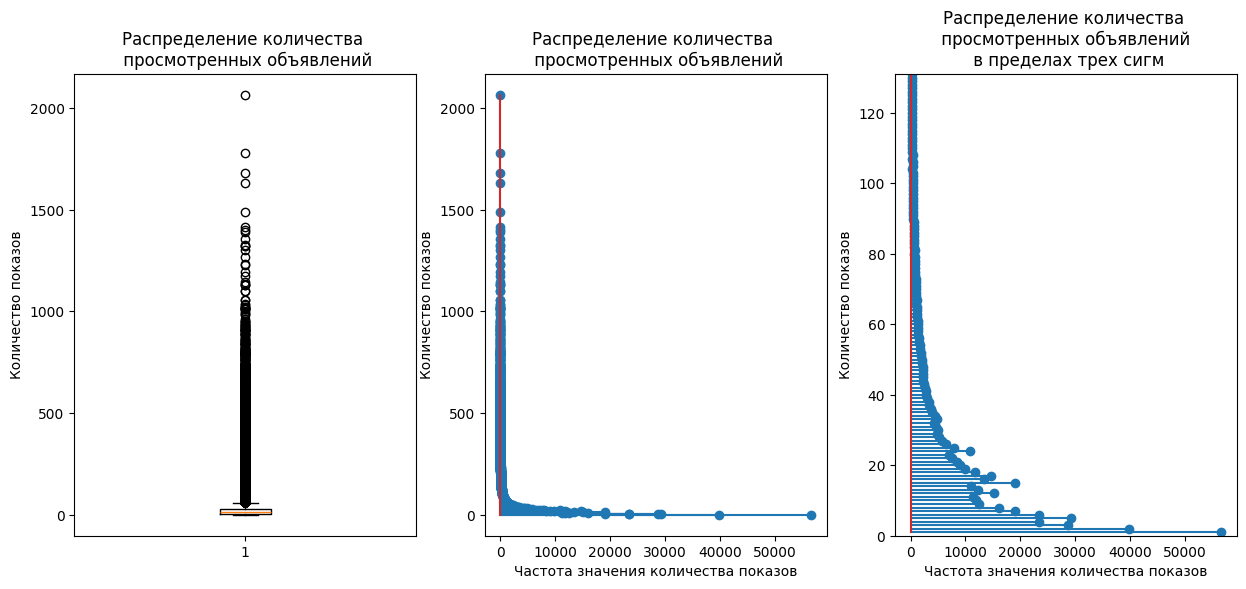

In [12]:
# Визуализация распределения просмотренных объявлений
fig, ax =  plt.subplots(1, 3, figsize = [15, 6])
ax[0].boxplot(df.total_ads)
ads_distr = df.total_ads.value_counts()
ax[1].stem(ads_distr.index, ads_distr, orientation='horizontal', )
ax[2].stem(ads_distr.index, ads_distr, orientation='horizontal', )
ax[0].set_title('Распределение количества \n просмотренных объявлений')
ax[1].set_title('Распределение количества \n просмотренных объявлений')
ax[2].set_title('Распределение количества \n просмотренных объявлений \n в пределах трех сигм')
ax[0].set_ylabel('Количество показов')
ax[1].set_ylabel('Количество показов')
ax[2].set_ylabel('Количество показов')
ax[2].set_xlabel('Частота значения количества показов')
ax[1].set_xlabel('Частота значения количества показов')
ax[2].set_ylim([0, sigma_*3])
plt.show();

Распределение просмотренных объявлений имеет большую положительную скошенность и много выбросов 

In [13]:
# Анализ распределения тестовых групп
df_ads = df[(df.test_group == 'ad')]
n_ads = df_ads.shape[0]
min_ads = df_ads.total_ads.min()
max_ads = df_ads.total_ads.max()
r_ads = max_ads - min_ads 
mean_ads = df_ads.total_ads.mean()
median_ads = df_ads.total_ads.median()
mode_ads = list(df_ads.total_ads.mode())
sigma_ads = df_ads.total_ads.std()
df_psa = df[(df.test_group == 'psa')]
n_psa = df_psa.shape[0]
min_psa = df_psa.total_ads.min()
max_psa = df_psa.total_ads.max()
r_psa = max_psa - min_psa 
mean_psa = df_psa.total_ads.mean()
median_psa = df_psa.total_ads.median()
mode_psa = list(df_psa.total_ads.mode())
sigma_psa = df_psa.total_ads.std()
print('Количество пользователей в ГРУППЕ ADS - показ коммерческой рекламы ', n_ads)
print('Минимальное значение количества показов рекламы одному пользователю', min_ads)
print('Максимальное значение количества показов рекламы одному пользователю', max_ads)
print('Размах значений количества показов рекламы одному пользователю', r_ads)
print('Среднее значение количества показов рекламы одному пользователю', mean_ads)
print('Медианое значение количества показов рекламы одному пользователю', median_ads) 
print('Мода количества показов рекламы одному пользователю', mode_ads)
print('Стандартное отклонение количества показов рекламы от среднего', sigma_ads)
print('----------------------------')
print('Количество пользователей в ГРУППЕ PSA - показ социальной рекламы ', n_psa)
print('Минимальное значение количества показов рекламы одному пользователю', min_psa)
print('Максимальное значение количества показов рекламы одному пользователю', max_psa)
print('Размах значений количества показов рекламы одному пользователю', r_psa)
print('Среднее значение количества показов рекламы одному пользователю', mean_psa)
print('Медианое значение количества показов рекламы одному пользователю', median_psa) 
print('Мода количества показов рекламы одному пользователю', mode_psa)
print('Стандартное отклонение количества показов рекламы от среднего', sigma_psa)

Количество пользователей в ГРУППЕ ADS - показ коммерческой рекламы  564577
Минимальное значение количества показов рекламы одному пользователю 1
Максимальное значение количества показов рекламы одному пользователю 2065
Размах значений количества показов рекламы одному пользователю 2064
Среднее значение количества показов рекламы одному пользователю 24.823365103431417
Медианое значение количества показов рекламы одному пользователю 13.0
Мода количества показов рекламы одному пользователю [1]
Стандартное отклонение количества показов рекламы от среднего 43.750456294767396
----------------------------
Количество пользователей в ГРУППЕ PSA - показ социальной рекламы  23524
Минимальное значение количества показов рекламы одному пользователю 1
Максимальное значение количества показов рекламы одному пользователю 907
Размах значений количества показов рекламы одному пользователю 906
Среднее значение количества показов рекламы одному пользователю 24.761137561639178
Медианое значение количества 

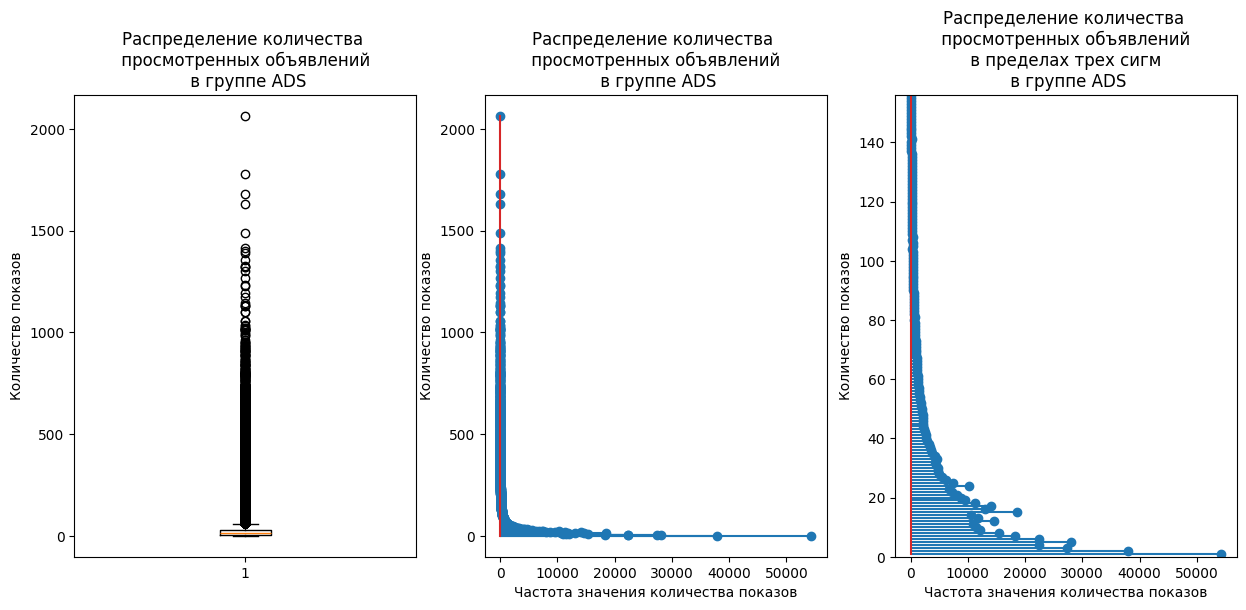

In [14]:
# Визуализация распределения просмотренных объявлений в ГРУППЕ ADS
fig, ax =  plt.subplots(1, 3, figsize = [15, 6])
ax[0].boxplot(df_ads.total_ads)
ads_distr = df_ads.total_ads.value_counts()
ax[1].stem(ads_distr.index, ads_distr, orientation = 'horizontal', )
ax[2].stem(ads_distr.index, ads_distr, orientation = 'horizontal', )
ax[0].set_title('Распределение количества \n просмотренных объявлений \n в группе ADS')
ax[1].set_title('Распределение количества \n просмотренных объявлений \n в группе ADS')
ax[2].set_title('Распределение количества \n просмотренных объявлений \n в пределах трех сигм \n в группе ADS')
ax[0].set_ylabel('Количество показов')
ax[1].set_ylabel('Количество показов')
ax[2].set_ylabel('Количество показов')
ax[2].set_xlabel('Частота значения количества показов')
ax[1].set_xlabel('Частота значения количества показов')
ax[2].set_ylim([0, mean_ads + sigma_ads*3])
plt.show();

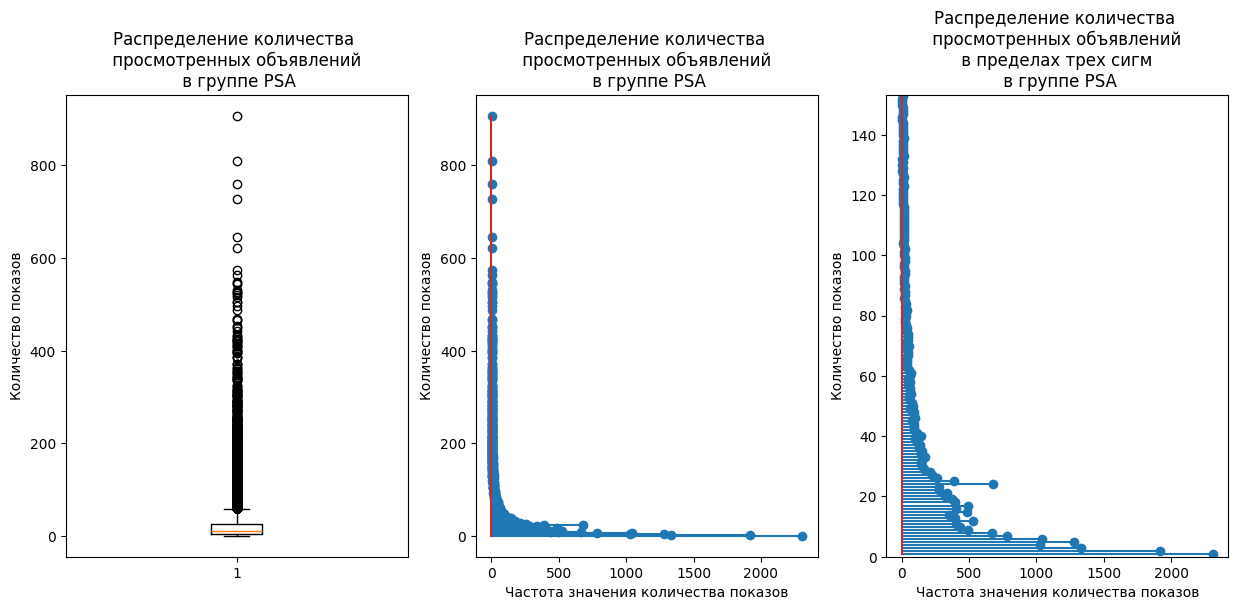

In [15]:
# Визуализация распределения просмотренных объявлений в ГРУППЕ PSA
fig, ax =  plt.subplots(1, 3, figsize = [15, 6])
ax[0].boxplot(df_psa.total_ads)
psa_distr = df_psa.total_ads.value_counts()
ax[1].stem(psa_distr.index, psa_distr, orientation = 'horizontal', )
ax[2].stem(psa_distr.index, psa_distr, orientation = 'horizontal', )
ax[0].set_title('Распределение количества \n просмотренных объявлений \n в группе PSA')
ax[1].set_title('Распределение количества \n просмотренных объявлений \n в группе PSA')
ax[2].set_title('Распределение количества \n просмотренных объявлений \n в пределах трех сигм \n в группе PSA')
ax[0].set_ylabel('Количество показов')
ax[1].set_ylabel('Количество показов')
ax[2].set_ylabel('Количество показов')
ax[2].set_xlabel('Частота значения количества показов')
ax[1].set_xlabel('Частота значения количества показов')
ax[2].set_ylim([0, mean_psa + sigma_psa*3])
plt.show();

- Распределение просмотренных объявлений в тестовых группах имеет большую положительную скошенность и много выбросов 
- Среднии значения. медианы и стандартное отклонение количества показов рекламы от среднего в группах имеют близкие значения
- Мода в группах = 1 показу

In [16]:
# Изучение распределения дней и часов с наибольшим количеством рекламы
df_days = df.groupby(by = 'most_ads_day')[['most_ads_day']].value_counts()
df_hour = df.groupby(by = 'most_ads_hour')[['most_ads_hour']].value_counts()

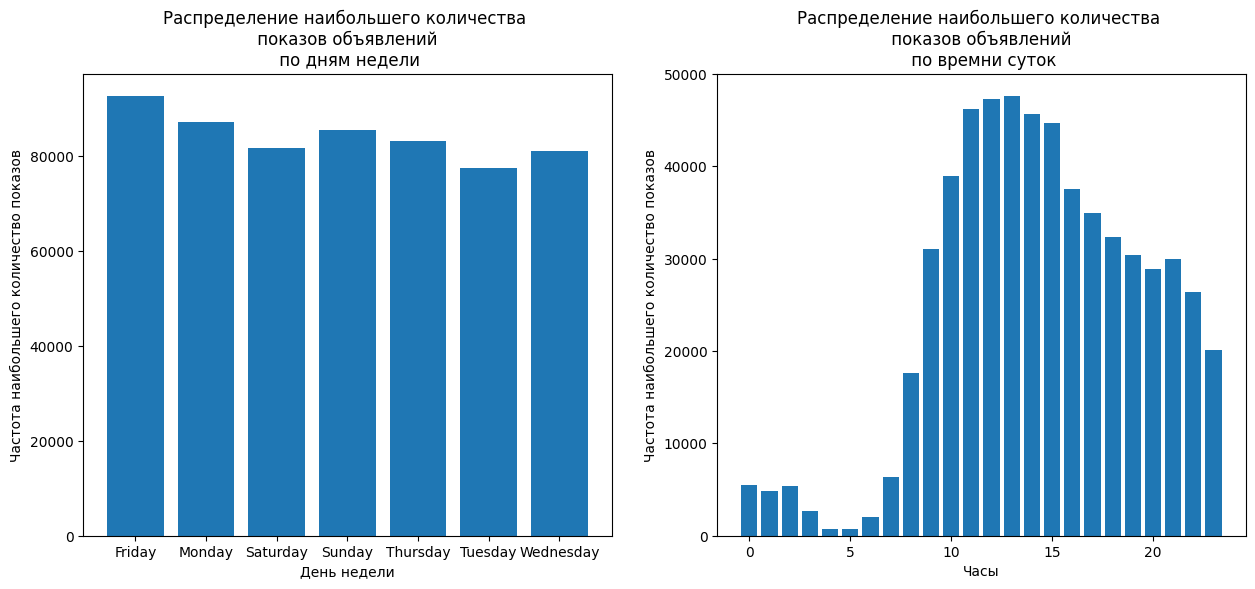

In [17]:
# Визуализация распределения максимальных значений показов рекламы по дням и часам
fig, ax =  plt.subplots(1, 2, figsize = [15, 6])
ax[0].bar(x = df_days.index, height = df_days.values)
ax[1].bar(x = df_hour.index, height = df_hour.values)
ax[0].set_title('Распределение наибольшего количества \n показов объявлений \n по дням недели')
ax[1].set_title('Распределение наибольшего количества \n показов объявлений \n по времни суток')
ax[0].set_ylabel('Частота наибольшего количество показов')
ax[1].set_ylabel('Частота наибольшего количество показов')
ax[0].set_xlabel('День недели')
ax[1].set_xlabel('Часы')
plt.show();

- Наибольшее количество показов рекламы наблюдается в пятницу, но в целом существенной разницы между днями недели не наблюдается
- Наибольшее количество показов рекламы наблюдается в дневные часы


Коэффициент конверсии для  ГРУППЫ ADS -  0.025546559636683747
Коэффициент конверсии для  ГРУППЫ PSA -  0.01785410644448223


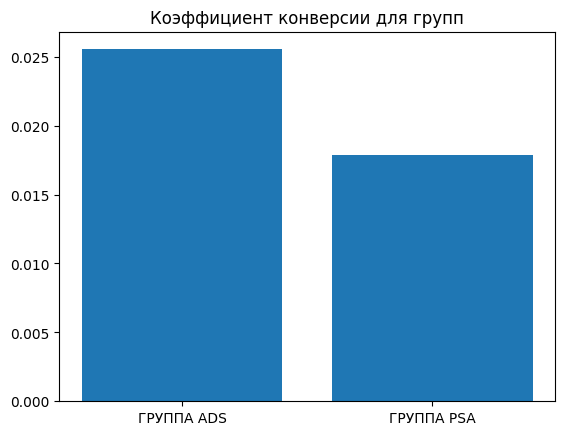

In [18]:
# Вычисление и визуализация коэффициентов конверсии для тестовых групп
cr_ads = sum(df_ads.converted)/df_ads.shape[0]
cr_psa = sum(df_psa.converted)/df_psa.shape[0]
print('Коэффициент конверсии для  ГРУППЫ ADS - ', cr_ads)
print('Коэффициент конверсии для  ГРУППЫ PSA - ', cr_psa)
plt.bar(x = ['ГРУППA ADS','ГРУППA PSA'], height = [cr_ads,cr_psa])
plt.title('Коэффициент конверсии для групп')
plt.show();


Конверсия в группе с коммерческой рекламой выше

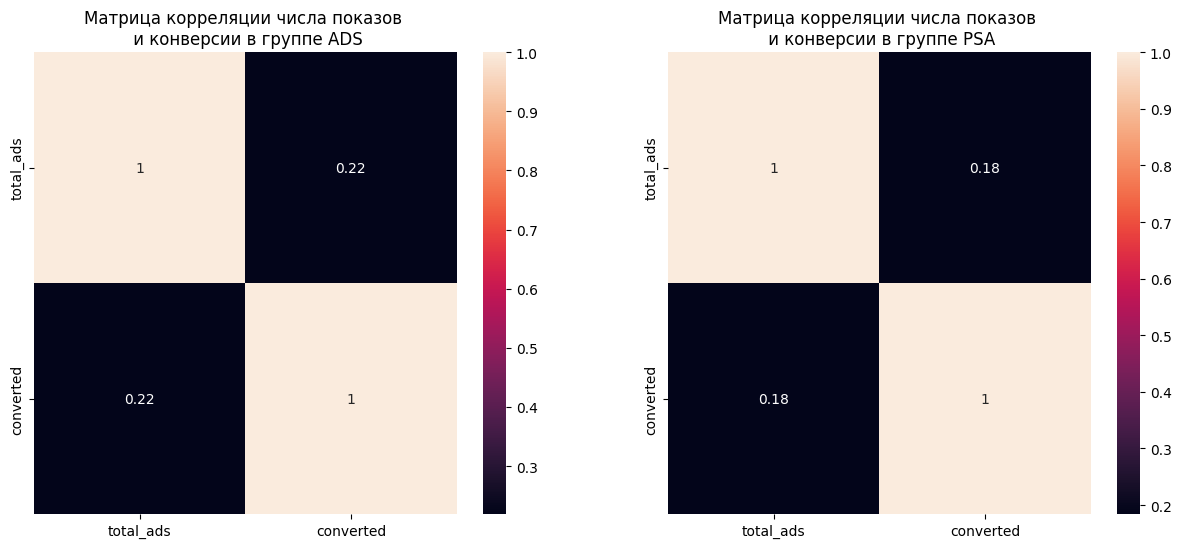

In [19]:
# Построение тепловой карты для корреляций признаков
df_corr_ads = df_ads[['total_ads', 'converted']]
df_corr_psa = df_psa[['total_ads', 'converted']]
fig, ax =  plt.subplots(1, 2, figsize = [15, 6])
plt.subplot(1, 2, 1)
sns.heatmap(df_corr_ads.corr(), annot = True, )
plt.subplot(1, 2, 2)
sns.heatmap(df_corr_psa.corr(), annot = True)

ax[0].set_title('Матрица корреляции числа показов \n и конверсии в группе ADS')
ax[1].set_title('Матрица корреляции числа показов \n и конверсии в группе PSA')


plt.show()

Наблюдается положительная корреляция между количеством показов рекламы и количеством конверсий

# 3. Анализ эффективности рекламы

Количестов просмотров рекламы в ГРУППЕ ADS -  14014701
Количестов просмотров рекламы в ГРУППЕ РSA -  582481
Процент пользователей, которые конвертировались после просмотра объявления в ГРУППЕ ADS -  2.5546559636683748
Процент пользователей, которые конвертировались после просмотра объявления в ГРУППЕ PSA -  1.785410644448223


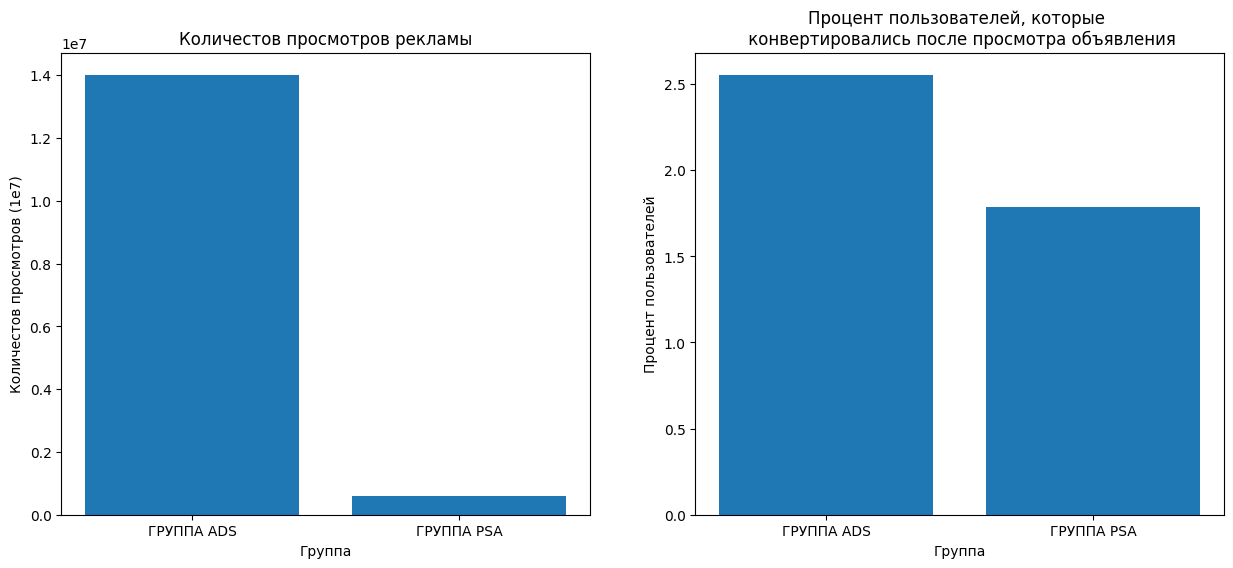

In [20]:
# Сравнение количества просмотров маркетинговых кампаний
view_ads = sum(df_ads.total_ads)
view_psa = sum(df_psa.total_ads)
print('Количестов просмотров рекламы в ГРУППЕ ADS - ', view_ads)
print('Количестов просмотров рекламы в ГРУППЕ РSA - ', view_psa)

# Изучение процента пользователей, которые конвертировались после просмотра объявления
proc_ads = cr_ads * 100
proc_psa = cr_psa * 100
print('Процент пользователей, которые конвертировались после просмотра объявления в ГРУППЕ ADS - ', proc_ads)
print('Процент пользователей, которые конвертировались после просмотра объявления в ГРУППЕ PSA - ', proc_psa)

# Визуализация процента пользователей, которые конвертировались после просмотра объявлений и 
# количества просмотров маркетинговых кампаний
fig, ax =  plt.subplots(1, 2, figsize = [15, 6]) 
ax[0].bar(x = ['ГРУППA ADS','ГРУППA PSA'], height = [view_ads,view_psa])
ax[1].bar(x = ['ГРУППA ADS','ГРУППA PSA'], height = [proc_ads,proc_psa])
ax[0].set_title('Количестов просмотров рекламы')
ax[1].set_title('Процент пользователей, которые \n конвертировались после просмотра объявления')
ax[0].set_ylabel('Количестов просмотров (1e7)')
ax[1].set_ylabel('Процент пользователей')
ax[0].set_xlabel('Группа')
ax[1].set_xlabel('Группа')
plt.show();

Количество показов коммерческой рекламы значительно превышает социальную рекламу, процент откликнувшихся на рекламы отличается незначительно

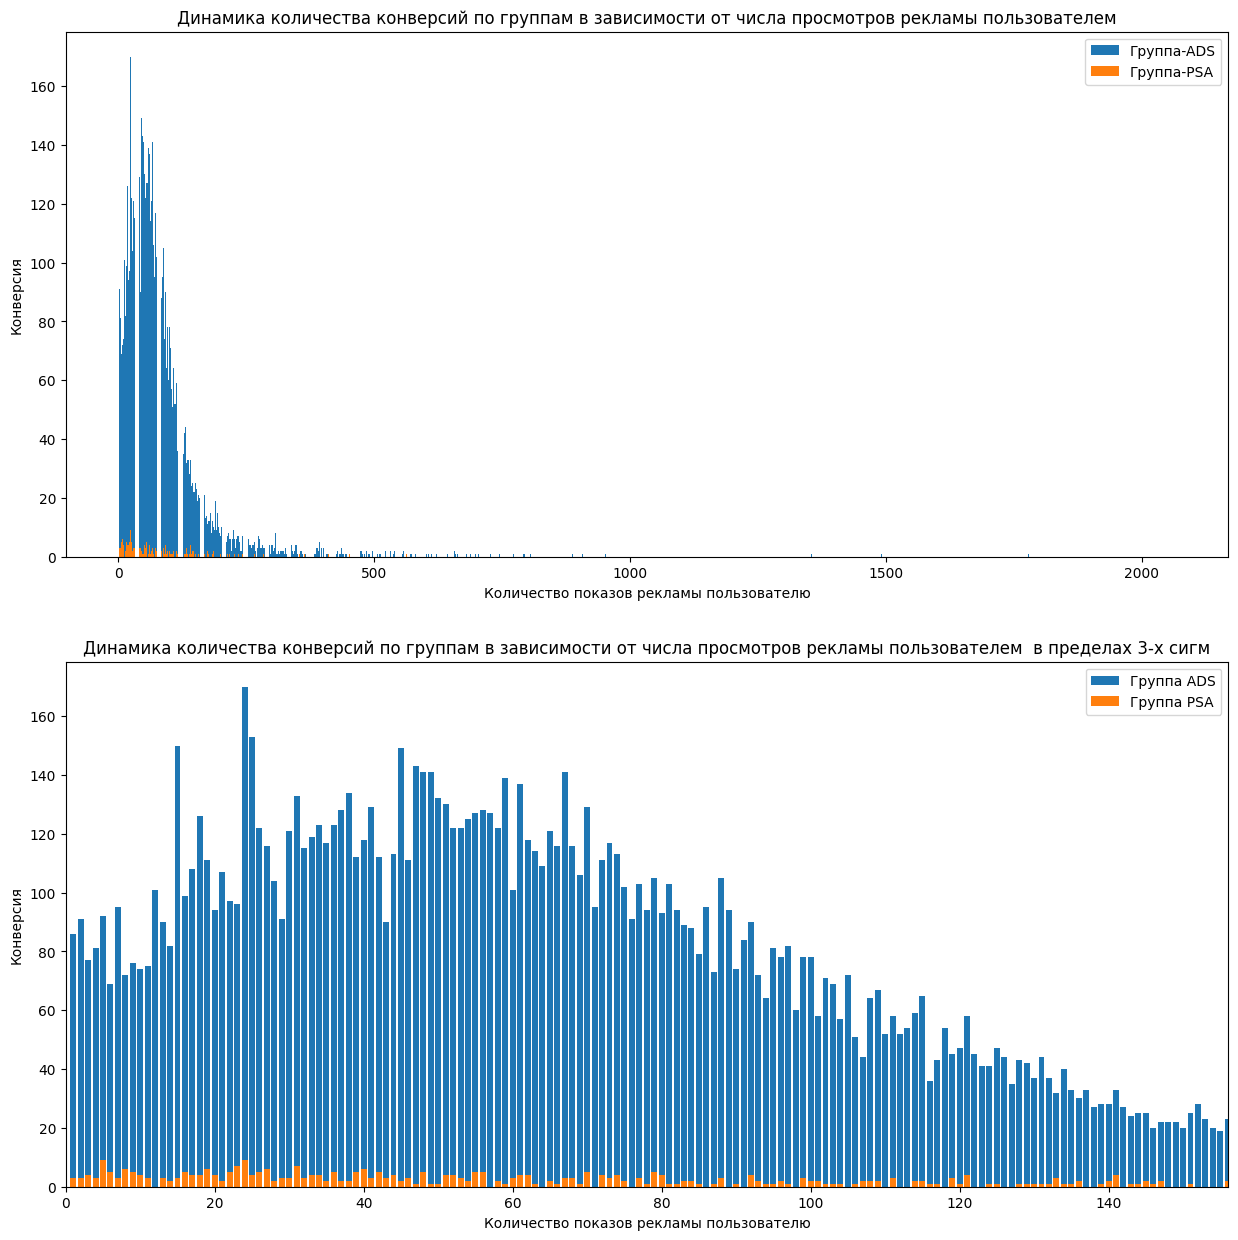

In [21]:
# Изучение динамики конверсий в зависимости от группы (реклама или пса)

conversion_by_ads = df_ads.groupby(['total_ads'])['converted'].sum()
conversion_by_psa = df_psa.groupby(['total_ads'])['converted'].sum()

fig, ax =  plt.subplots(2, 1, figsize = [15, 15]) 


ax[0].bar(x = conversion_by_ads.index, height = conversion_by_ads.values, label = 'Группа-ADS')
ax[0].bar(x = conversion_by_psa.index, height = conversion_by_psa.values, label = 'Группа-PSA')
ax[1].bar(x = conversion_by_ads.index, height = conversion_by_ads.values, label = 'Группа ADS' )
ax[1].bar(x = conversion_by_psa.index, height = conversion_by_psa.values, label = 'Группа PSA')
ax[0].set_title('Динамика количества конверсий по группам в зависимости от числа просмотров рекламы пользователем')
ax[1].set_title('Динамика количества конверсий по группам в зависимости от числа просмотров рекламы пользователем  в пределах 3-х сигм')
ax[0].set_ylabel('Конверсия')
ax[1].set_ylabel('Конверсия')
ax[0].set_xlabel('Количество показов рекламы пользователю')
ax[1].set_xlabel('Количество показов рекламы пользователю')
ax[1].set_xlim([0, mean_ads + sigma_ads*3])
ax[0].legend()
ax[1].legend()
plt.show();

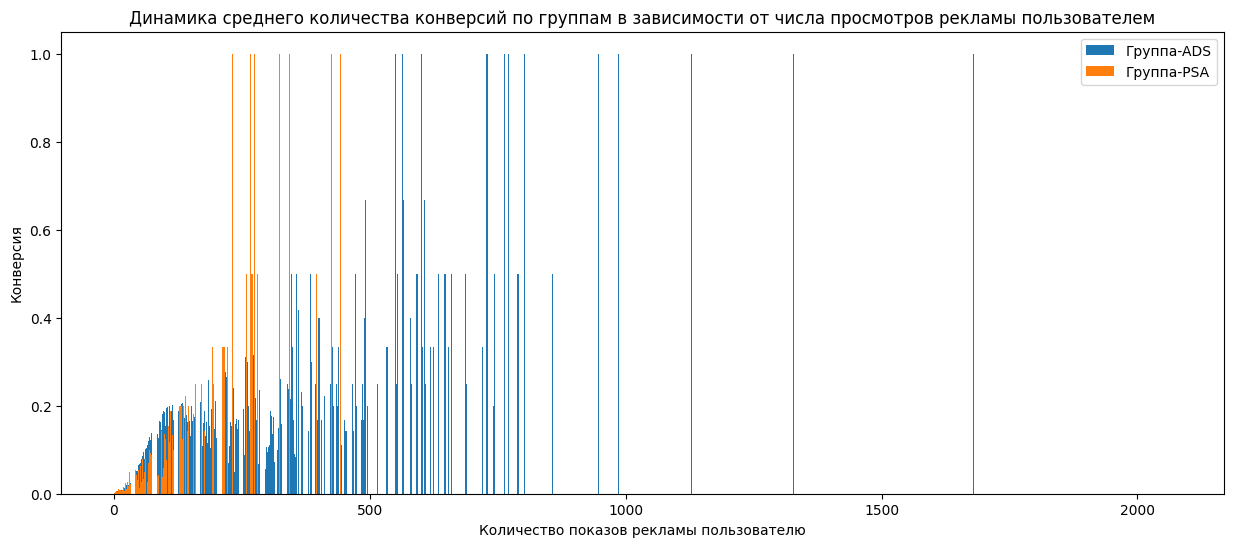

In [22]:
# динамики среднего количества конверсий в зависимости от группы (реклама или пса)
mean_conversion_by_ads = df_ads.groupby(['total_ads'])['converted'].mean()
mean_conversion_by_psa = df_psa.groupby(['total_ads'])['converted'].mean()
fig, ax =  plt.subplots(1, 1, figsize = [15, 6]) 
plt.bar(x = mean_conversion_by_ads.index, height = mean_conversion_by_ads.values, label = 'Группа-ADS')
plt.bar(x = mean_conversion_by_psa.index, height = mean_conversion_by_psa.values, label = 'Группа-PSA')
plt.title('Динамика среднего количества конверсий по группам в зависимости от числа просмотров рекламы пользователем')
plt.ylabel('Конверсия')
plt.xlabel('Количество показов рекламы пользователю')
plt.legend()
plt.show();

# 4. Анализ времени просмотра объявлений

В датасете отсутствую данные, когда была совершена конверсия, но допустим, что столбцы most ads day и most ads hour содержат время конверсии (смотреть ремарку по пункту 1)

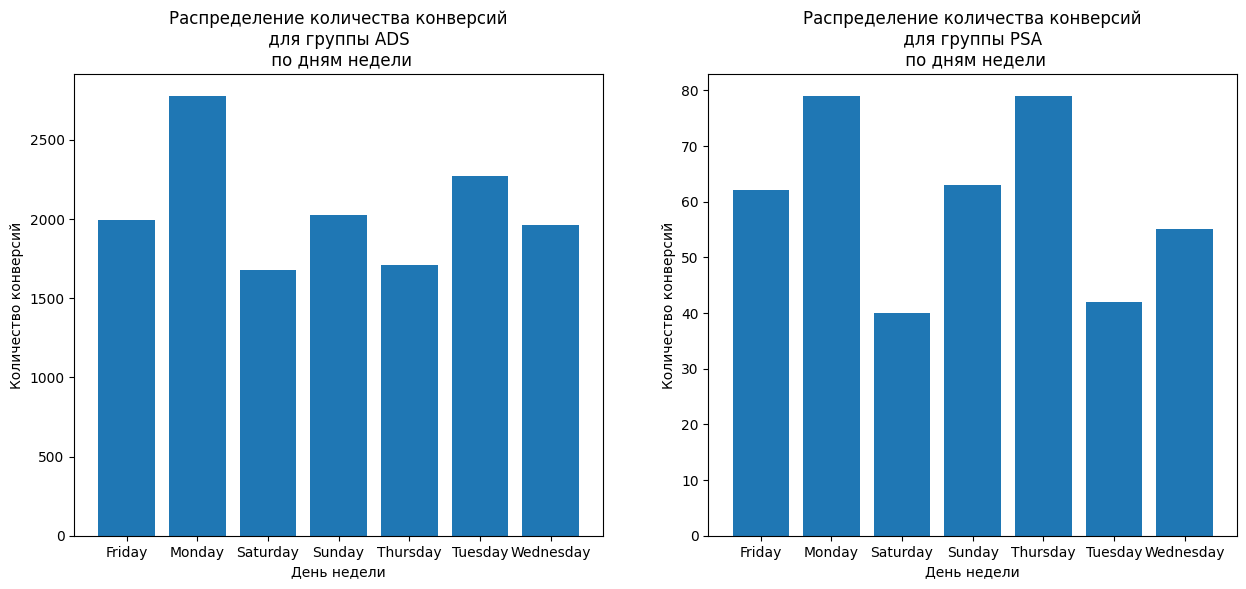

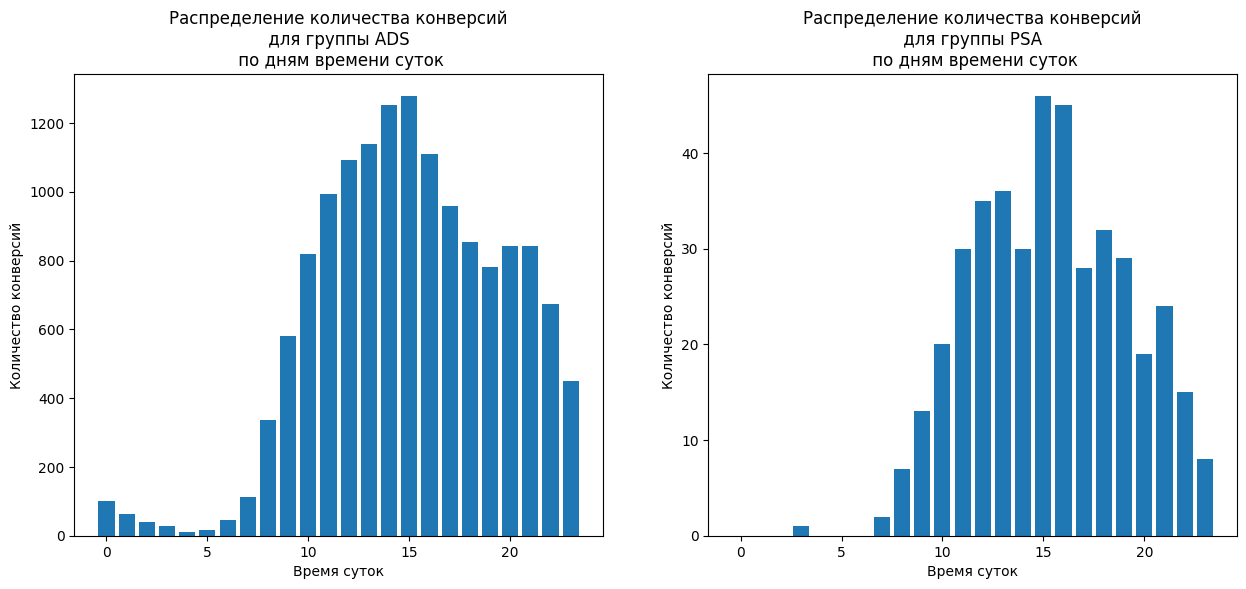

In [23]:
# Изучение дней и часов, когда было совершено наибольшее количество конверсий
conversion_by_day_ads = df_ads.groupby(['most_ads_day'])['converted'].sum()
conversion_by_day_psa = df_psa.groupby(['most_ads_day'])['converted'].sum()
conversion_by_hour_ads = df_ads.groupby(['most_ads_hour'])['converted'].sum()
conversion_by_hour_psa = df_psa.groupby(['most_ads_hour'])['converted'].sum()
# Визуализация распределения конверсий по дням 
fig, ax =  plt.subplots(1, 2, figsize = [15, 6])
ax[0].bar(x = conversion_by_day_ads.index, height = conversion_by_day_ads.values)
ax[1].bar(x = conversion_by_day_psa.index, height = conversion_by_day_psa.values)
ax[0].set_title('Распределение количества конверсий\n для группы ADS \n по дням недели')
ax[1].set_title('Распределение количества конверсий\n для группы PSA \n по дням недели')
ax[0].set_ylabel('Количество конверсий')
ax[1].set_ylabel('Количество конверсий')
ax[0].set_xlabel('День недели')
ax[1].set_xlabel('День недели')
plt.show();

# Визуализация распределения конверсий по времени  суток
fig, ax =  plt.subplots(1, 2, figsize = [15, 6])
ax[0].bar(x = conversion_by_hour_ads.index, height = conversion_by_hour_ads.values)
ax[1].bar(x = conversion_by_hour_psa.index, height = conversion_by_hour_psa.values)
ax[0].set_title('Распределение количества конверсий\n для группы ADS \n по дням времени суток')
ax[1].set_title('Распределение количества конверсий\n для группы PSA \n по дням времени суток')
ax[0].set_ylabel('Количество конверсий')
ax[1].set_ylabel('Количество конверсий')
ax[0].set_xlabel('Время суток')
ax[1].set_xlabel('Время суток')
plt.show();


Наибольшее количество конверсий совершенно в дневное время в понедельник

# 5. Статистический анализ

In [24]:
# Определение нормальности распределения конверсий в тестовых группах (Shapiro-Wilk тест)
alpha = 0.05 #Уровень значимости
# Функция для для Shapiro-Wilk-теста 
def result_shapiro (group_1):
    _, p_value = shapiro(group_1)
    negative = f' P-значение = {p_value}. \
        \n Не обнаружены статистически значимые различия между распрелением в группе и нормальным распределением \n'
    positive = f' P-значение = {p_value}. \
        \n Обнаружены статистически значимые различия между распрелением в группе и нормальным распределением \n'
    if p_value > alpha:
        return negative
    else:
        return positive

print(f'Для группs АDS  {result_shapiro(conversion_by_ads)}')
print(f'Для группs PSA  {result_shapiro(conversion_by_psa)}')


# T-тест для сравнения средних значений конверсий в тестовых группах

# Функция для для t-теста и вывода стаитистической значимости
def result_ttest (group_1, group_2):
    _, p_value = ttest_ind(group_1, group_2)
    negative = f' P-значение = {p_value}. \n Статистически значимых различий между группами не найдено'
    positive = f' P-значение = {p_value}. \n Обнаружены статистически значимые различия между группами'
    if p_value > alpha:
        return negative
    else:
        return positive

print(f'Для средних значений конверсии групп АDS и PSA {result_ttest(mean_conversion_by_ads, mean_conversion_by_psa)}')

#Тест Левена для определения равенства дисперсий.
# Функция для теста Levena и вывода стаитистической значимости
def result_levene (group_1, group_2):
    _, p_value = levene(group_1, group_2, center='mean')
    negative = f' P-значение = {p_value}. \n Статистически значимых различий между группами не найдено'
    positive = f' P-значение = {p_value}. \n Обнаружены статистически значимые различия между группами'
    if p_value > alpha:
        return negative
    else:
        return positive
print(f'\n Для значений дисперсий конверсии групп АDS и PSA {result_ttest(conversion_by_ads, conversion_by_psa)}')



Для группs АDS   P-значение = 7.96834358753664e-41.         
 Обнаружены статистически значимые различия между распрелением в группе и нормальным распределением 

Для группs PSA   P-значение = 5.934938222445106e-23.         
 Обнаружены статистически значимые различия между распрелением в группе и нормальным распределением 

Для средних значений конверсии групп АDS и PSA  P-значение = 0.0037180429154445357. 
 Обнаружены статистически значимые различия между группами

 Для значений дисперсий конверсии групп АDS и PSA  P-значение = 1.2383669015030934e-17. 
 Обнаружены статистически значимые различия между группами


# 6. Проверка однородности дисперсии

In [25]:
# Функция для для t-теста и вывода стаитистической значимости
def result_ttest (group_1, group_2):
    _, p_value = ttest_ind(group_1, group_2, equal_var=True)
    negative = f' P-значение = {p_value}. \n Статистически значимых различий между группами не найдено'
    positive = f' P-значение = {p_value}. \n Обнаружены статистически значимые различия между группами'
    if p_value > alpha:
        return negative
    else:
        return positive

print(f'Для дисперсий конверсии групп АDS и PSA {result_ttest(conversion_by_ads, conversion_by_psa)}')


Для дисперсий конверсии групп АDS и PSA  P-значение = 1.2383669015030934e-17. 
 Обнаружены статистически значимые различия между группами


# 7. коэффициент конверсии

In [26]:
# коэффициент конверсии
converts_ads = 100*sum(df_ads.converted)/(df_ads.shape[0] - sum(df_ads.converted))
converts_psa = 100*sum(df_psa.converted)/(df_psa.shape[0] - sum(df_psa.converted))
print(f'коэффициент конверсии для ads {converts_ads} для psa {converts_psa}')
# (100 * converts_psa[1]/converts_psa[0]), (100 * converts_ad[1]/converts_ad[0])

коэффициент конверсии для ads 2.6216295800812137 для psa 1.8178670360110802


# 8. Выводы и рекомендации

По результам исследования можно сделать заключение:
- групы имеют с статистически значимые различия 
- коммерческая реклама имеет конверсию большея, чем социальное
- количество показаов и количество конверсий имеет положительную корреляцию
- наибольшее количество просмотров рекламы приходится на дневное время (рабочии часы)

# 9. A/A тестирование

In [27]:
# Разделим наши данные на две группы
df_p = df.sample(frac = 1)
df_AA1 = df_p.iloc[:(round(df.shape[0]/2))]
df_AA2 = df_p.iloc[(round(df.shape[0]/2)):]

# Проверим размеры групп
print(df_AA1.shape)
print(df_AA2.shape)

# Проведем t-тест для проверки различий между группами
conversion_by_AA1 = df_AA1.groupby(['total_ads'])['converted'].sum()
conversion_by_AA2 = df_AA2.groupby(['total_ads'])['converted'].sum()

print(f'Для значений конверсии групп AA1 и AA2 {result_ttest(conversion_by_AA1, conversion_by_AA2)}')


(294050, 6)
(294051, 6)
Для значений конверсии групп AA1 и AA2  P-значение = 0.8114453785641531. 
 Статистически значимых различий между группами не найдено


# 10. Полезная визуализация A/A тестирования

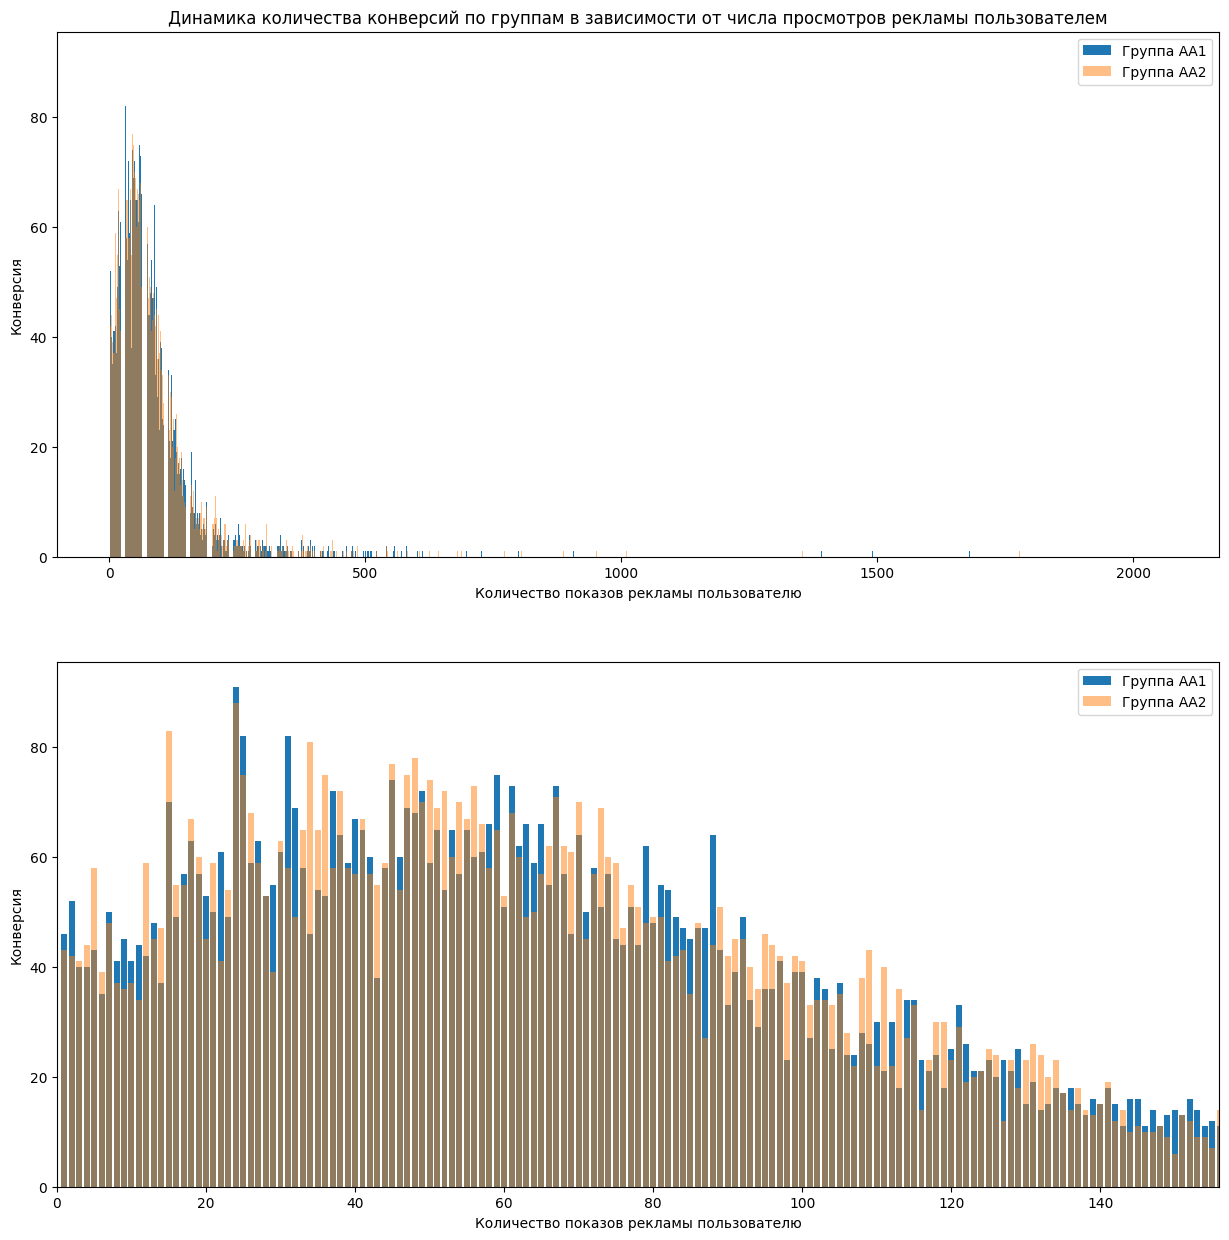

In [28]:
# Гистограмма распределения значений в группах

fig, ax =  plt.subplots(2, 1, figsize = [15, 15]) 

ax[0].bar(x = conversion_by_AA1.index, height = conversion_by_AA1.values, label = 'Группа АА1')
ax[0].bar(x = conversion_by_AA2.index, height = conversion_by_AA2.values, alpha = 0.5, label = 'Группа АА2')
ax[1].bar(x = conversion_by_AA1.index, height = conversion_by_AA1.values, label = 'Группа АА1')
ax[1].bar(x = conversion_by_AA2.index, height = conversion_by_AA2.values, alpha = 0.5, label = 'Группа АА2')
ax[0].set_title('Динамика количества конверсий по группам в зависимости от числа просмотров рекламы пользователем')
ax[1].set_title
('Динамика количества конверсий по группам в зависимости от числа просмотров рекламы пользователем  в пределах 3-х сигм')
ax[0].set_ylabel('Конверсия')
ax[1].set_ylabel('Конверсия')
ax[0].set_xlabel('Количество показов рекламы пользователю')
ax[1].set_xlabel('Количество показов рекламы пользователю')
ax[0].legend()
ax[1].legend()
ax[1].set_xlim([0, mean_ + sigma_*3])
plt.show();


Коэффициент конверсии для  ГРУППЫ AA1 -  2.499574902227512
Коэффициент конверсии для  ГРУППЫ AA2 -  2.54819742153572


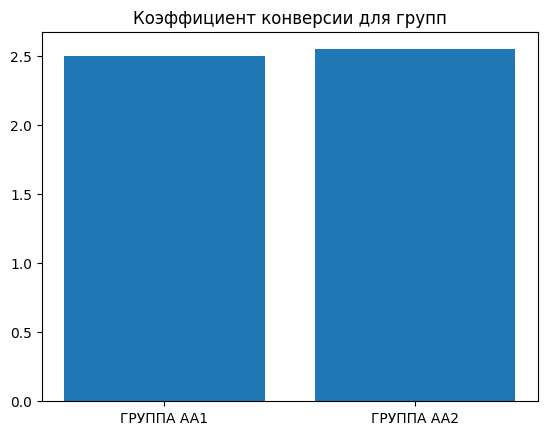

In [29]:
# Сравнение конверсий между двуми группами
# conversion_rates_AA = ...
conversion_AA1 = 100*sum(df_AA1.converted)/df_AA1.shape[0]
conversion_AA2 = 100*sum(df_AA2.converted)/df_AA2.shape[0]
print('Коэффициент конверсии для  ГРУППЫ AA1 - ', conversion_AA1)
print('Коэффициент конверсии для  ГРУППЫ AA2 - ', conversion_AA2)

plt.bar(x = ['ГРУППA AA1','ГРУППA AA2'], height = [conversion_AA1,conversion_AA2])
plt.title('Коэффициент конверсии для групп')
plt.show();

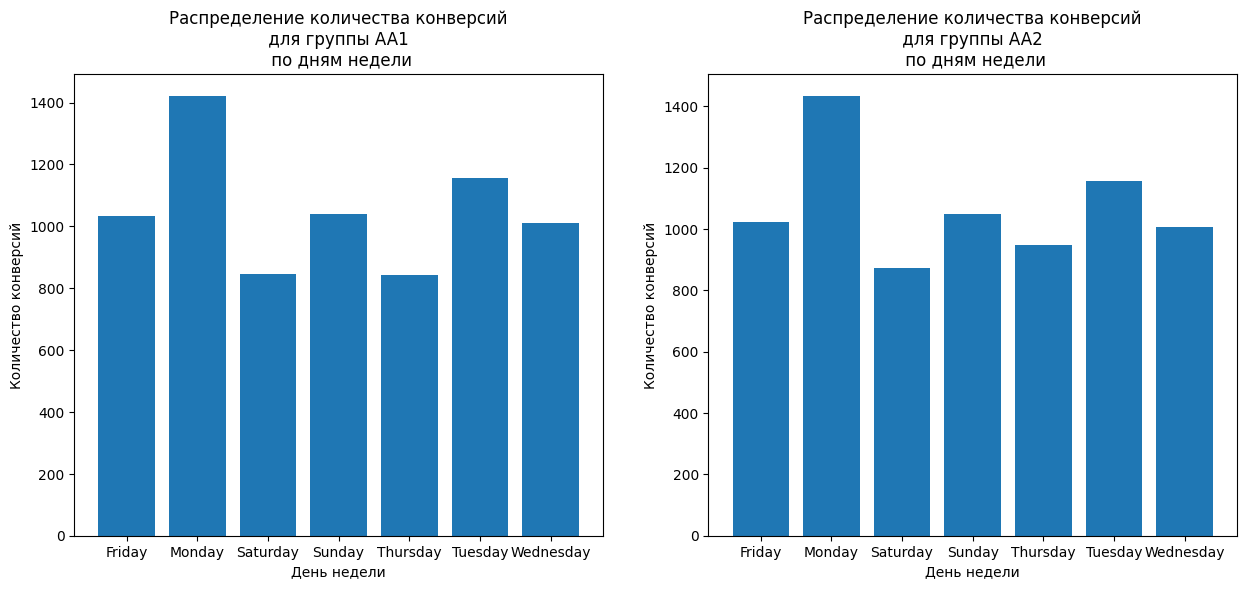

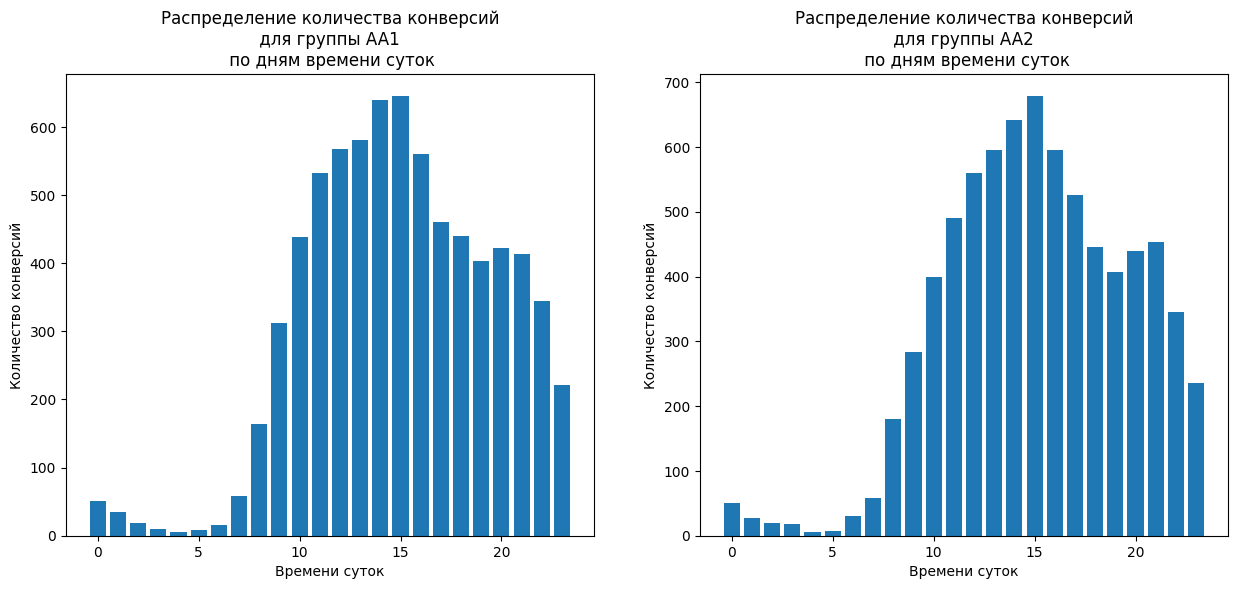

In [30]:
# Изучение дней и часов, когда было совершено наибольшее количество конверсий
conversion_by_day_AA1 = df_AA1.groupby(['most_ads_day'])['converted'].sum()
conversion_by_day_AA2 = df_AA2.groupby(['most_ads_day'])['converted'].sum()
conversion_by_hour_AA1 = df_AA1.groupby(['most_ads_hour'])['converted'].sum()
conversion_by_hour_AA2 = df_AA2.groupby(['most_ads_hour'])['converted'].sum()
# Визуализация распределения конверсий по дням 
fig, ax =  plt.subplots(1, 2, figsize = [15, 6])
ax[0].bar(x = conversion_by_day_AA1.index, height = conversion_by_day_AA1.values)
ax[1].bar(x = conversion_by_day_AA2.index, height = conversion_by_day_AA2.values)
ax[0].set_title('Распределение количества конверсий\n для группы AA1 \n по дням недели')
ax[1].set_title('Распределение количества конверсий\n для группы AA2 \n по дням недели')
ax[0].set_ylabel('Количество конверсий')
ax[1].set_ylabel('Количество конверсий')
ax[0].set_xlabel('День недели')
ax[1].set_xlabel('День недели')
plt.show();

# Визуализация распределения конверсий по времени  суток
fig, ax =  plt.subplots(1, 2, figsize = [15, 6])
ax[0].bar(x = conversion_by_hour_AA1.index, height = conversion_by_hour_AA1.values)
ax[1].bar(x = conversion_by_hour_AA2.index, height = conversion_by_hour_AA2.values)
ax[0].set_title('Распределение количества конверсий\n для группы AA1 \n по дням времени суток')
ax[1].set_title('Распределение количества конверсий\n для группы AA2 \n по дням времени суток')
ax[0].set_ylabel('Количество конверсий')
ax[1].set_ylabel('Количество конверсий')
ax[0].set_xlabel('Времени суток')
ax[1].set_xlabel('Времени суток')
plt.show();

# 11. Выводы и рекомендации 

АА тестирование показало что статистических различий между группаи нет, следовательно система работает нормально и на ней можно проводить эксперемент

**ВЫВОД не связаный с поставленной задачей**

Так как, показ рекламы пользователю можно трактовать - пользователь находится на сайте, по данным проведенного эксперимента можно сделать заключение, что люди в рабочее время не работают, а просматривают различный контент